In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digit=load_digits()

In [3]:
print("ImageDataShape", digit.data.shape)
print("LabelDataShape", digit.target.shape)

ImageDataShape (1797, 64)
LabelDataShape (1797,)


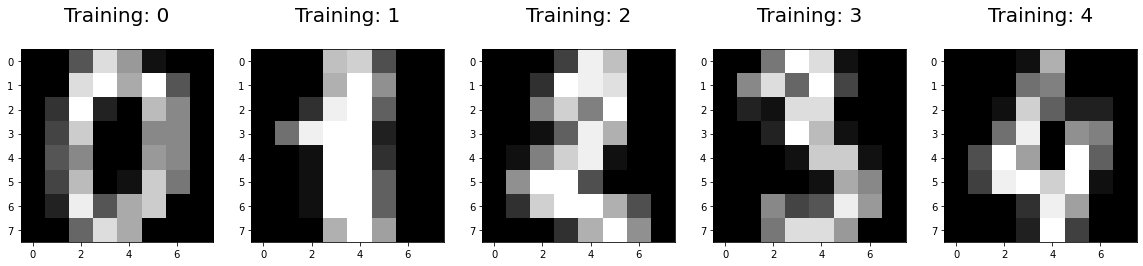

In [8]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label )in enumerate(zip(digit.data[0:5], digit.target[0:5])):
    plt.subplot(1,5, index + 1)
    plt.imshow(np.reshape(image, (8,8)),cmap=plt.cm.gray)   
    plt.title("Training: %i\n" % label,fontsize=20)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(digit.data, digit.target, test_size = 0.23, random_state = 2)

In [10]:
print(x_train.shape)

(1383, 64)


In [11]:
print(y_train.shape)

(1383,)


In [12]:
print(x_test.shape)

(414, 64)


In [13]:
print(y_test.shape)

(414,)


In [14]:
from sklearn.linear_model import LogisticRegression

In [29]:
logisticRegr=LogisticRegression()
logisticRegr.fit(x_train, y_train)

C:\Users\phera\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
print(logisticRegr.predict(x_test[0].reshape(1,-1)))

[4]


In [30]:
logisticRegr.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

### predicting the entire datasets

In [18]:
predictions=logisticRegr.predict(x_test)

### determining the accuracy of the model

In [19]:
score=logisticRegr.score(x_test,y_test)
print(score)

0.9516908212560387


### representing the confusion matrix in heatmap

In [31]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


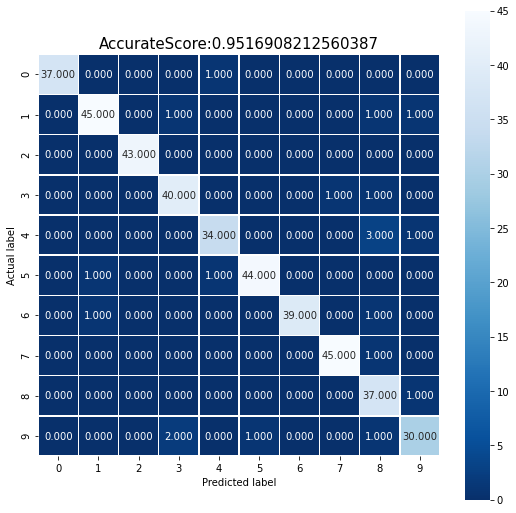

In [28]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title='AccurateScore:{0}'.format(score)
plt.title(all_sample_title, size=15);

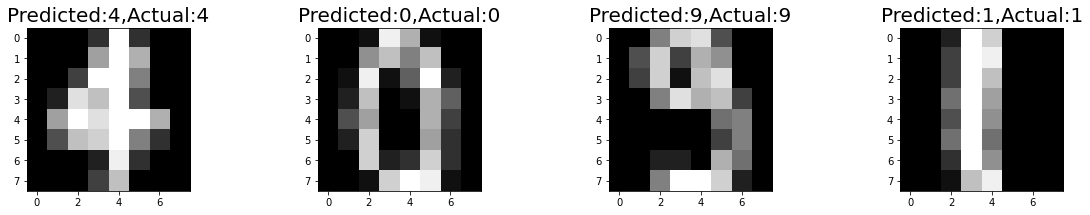

In [32]:
index=0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
plt.figure(figsize=(20,3))   
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot (1,4, plotIndex +1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)), cmap=plt.cm.gray)
    plt.title('Predicted:{},Actual:{}'.format(predictions[wrong], y_test[wrong]), fontsize=20)